## Classification (PA3.4b)

In [2]:
## Data generation

In [4]:
from basic_fcn import *
from utils import *
import torch.optim as optim
import time
from torch.utils.data import DataLoader
import torch
import gc
import copy
from dataloader_4 import *
from starter_4 import *


class DiceBCELoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceBCELoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
        _input = F.sigmoid(_input)       
        _input = _input.view(-1) #flatten
        _tar = _tar.view(-1) #flatten
        dice_loss = 1 - (2.*(_input * _tar).sum() + smooth)/(inputs.sum() + targets.sum() + smooth) # A & B / A + B  
        Dice_BCE = F.binary_cross_entropy(inputs, targets, reduction='mean') + dice_loss
        return Dice_BCE
    
    

in starter_4
GPU_STATUS: True


In [5]:
class_weights = torch.FloatTensor([1.7796e-01, 6.1295e-01, 4.1182e-02, 8.9837e-03, 1.0163e-01, 6.8722e-03,
        1.4485e-03, 1.5937e-04, 4.7746e-02, 1.0698e-03])

In [ ]:
# def compute_class_weights(dataloader):
#     # Labels: batch_size x height x width
#     total_num_pixels = 0
#     n_class = 10
#     class_weights = torch.zeros(n_class)
#     for i, (inputs, labels) in enumerate(dataloader):
#         total_num_pixels += labels.shape[0] * labels.shape[1] * labels.shape[2]
#         for cur_class in range(n_class):
#             class_weights[cur_class] += torch.sum(labels == cur_class)
#         print("SANITY CHECK:", total_num_pixels, class_weights.sum())
#         print("class_weights:", class_weights)
        
#     return class_weights / total_num_pixels

In [ ]:
# train_dataset_original_1 = TASDataset('tas500v1.1') 
# train_loader_1 = DataLoader(dataset=train_dataset_original_1, batch_size= 16, shuffle=False)

# class_weights = compute_class_weights(train_loader_1)
# print(class_weights)

In [7]:

dice = DiceBCELoss()    
#hyper param
epochs = 50   
lr = 0.0004
criterion = dice
n_class = 10

print("creating model...")
fcn_model = FCN(n_class=n_class)
fcn_model.apply(init_weights)

# gpu
gpu_status = torch.cuda.is_available()
print("GPU:", gpu_status)

if gpu_status : 
    device = torch.device('cuda') # determine which device to use (gpu or cpu)
else : 
    device = torch.device('cpu')

fcn_model.to(device)
    
print("Training...")
val(fcn_model, 0)  # show the accuracy before training
model_name="latest_model_4b_BCE"
train_loss_record, valid_loss_record = train(fcn_model, epochs,lr, save_fp=model_name) 

creating model...
GPU: True
Training...
in val


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\transforms\functional.py:126: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:189.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()
  0%|          | 0/50 [00:00<?, ?it/s]

Loss at epoch: 0 is 3.321566275187901
IoU at epoch: 0 is 0.014685864148496769
Pixel acc at epoch: 0 is 0.05670505655663354
in train
epoch0, iter0, loss: 3.9393436908721924
epoch0, iter10, loss: 3.674466848373413
epoch0, iter20, loss: 3.2582168579101562
epoch0, iter30, loss: 2.60577654838562
epoch0, iter40, loss: 2.450064182281494
epoch0, iter50, loss: 2.091357707977295
Finish epoch 0, time elapsed 75.4525454044342
in val


  2%|▏         | 1/50 [01:21<1:06:51, 81.87s/it]

Loss at epoch: 0 is 2.4902922766549245
IoU at epoch: 0 is 0.06803297427408296
Pixel acc at epoch: 0 is 0.29876876941749025
epoch1, iter0, loss: 2.571995735168457
epoch1, iter10, loss: 2.2792084217071533
epoch1, iter20, loss: 2.0594358444213867
epoch1, iter30, loss: 2.506227731704712
epoch1, iter40, loss: 1.6626149415969849
epoch1, iter50, loss: 2.0083227157592773
Finish epoch 1, time elapsed 74.12716603279114
in val


  4%|▍         | 2/50 [02:41<1:05:03, 81.33s/it]

Loss at epoch: 1 is 1.8321059771946497
IoU at epoch: 1 is 0.14110202233601213
Pixel acc at epoch: 1 is 0.5314826198986599
epoch2, iter0, loss: 1.6742262840270996
epoch2, iter10, loss: 1.2594866752624512
epoch2, iter20, loss: 1.470660924911499
epoch2, iter30, loss: 1.881674885749817
epoch2, iter40, loss: 1.1918063163757324
epoch2, iter50, loss: 1.949898362159729
Finish epoch 2, time elapsed 79.35626029968262
in val


  6%|▌         | 3/50 [04:07<1:04:46, 82.69s/it]

Loss at epoch: 2 is 1.8622623511723109
IoU at epoch: 2 is 0.2036156526448225
Pixel acc at epoch: 2 is 0.7100598471505302
epoch3, iter0, loss: 1.285456657409668
epoch3, iter10, loss: 1.6052474975585938
epoch3, iter20, loss: 1.0138254165649414
epoch3, iter30, loss: 1.2500081062316895
epoch3, iter40, loss: 1.0733312368392944
epoch3, iter50, loss: 1.2181363105773926
Finish epoch 3, time elapsed 77.43986868858337
in val


  8%|▊         | 4/50 [05:31<1:03:41, 83.08s/it]

Loss at epoch: 3 is 1.5005828312465124
IoU at epoch: 3 is 0.24650460109506492
Pixel acc at epoch: 3 is 0.7435062953404018
epoch4, iter0, loss: 1.5727585554122925
epoch4, iter10, loss: 1.4783456325531006
epoch4, iter20, loss: 1.601751685142517
epoch4, iter30, loss: 1.3809809684753418
epoch4, iter40, loss: 1.1775139570236206
epoch4, iter50, loss: 1.031408429145813
Finish epoch 4, time elapsed 73.0032856464386
in val


 10%|█         | 5/50 [06:50<1:01:24, 81.89s/it]

Loss at epoch: 4 is 1.0068811348506383
IoU at epoch: 4 is 0.3398312060919018
Pixel acc at epoch: 4 is 0.8005556634494236
epoch5, iter0, loss: 1.3871885538101196
epoch5, iter10, loss: 1.351478934288025
epoch5, iter20, loss: 1.144163966178894
epoch5, iter30, loss: 0.7687044739723206
epoch5, iter40, loss: 1.2325612306594849
epoch5, iter50, loss: 0.7668262124061584
Finish epoch 5, time elapsed 73.0217878818512
in val


 12%|█▏        | 6/50 [08:10<59:26, 81.05s/it]  

Loss at epoch: 5 is 0.895523726940155
IoU at epoch: 5 is 0.3465027903987628
Pixel acc at epoch: 5 is 0.8100235121590751
epoch6, iter0, loss: 0.7651640772819519
epoch6, iter10, loss: 0.7706091403961182
epoch6, iter20, loss: 1.2442032098770142
epoch6, iter30, loss: 0.9284459352493286
epoch6, iter40, loss: 0.9619309306144714
epoch6, iter50, loss: 0.5429534912109375
Finish epoch 6, time elapsed 73.68550324440002
in val


 14%|█▍        | 7/50 [09:29<57:50, 80.71s/it]

Loss at epoch: 6 is 0.7841242040906634
IoU at epoch: 6 is 0.352635982668413
Pixel acc at epoch: 6 is 0.8115989225251334
epoch7, iter0, loss: 0.6646289825439453
epoch7, iter10, loss: 0.8897161483764648
epoch7, iter20, loss: 0.8193188309669495
epoch7, iter30, loss: 0.6150012016296387
epoch7, iter40, loss: 1.0114936828613281
epoch7, iter50, loss: 0.6333462595939636
Finish epoch 7, time elapsed 75.85739421844482
in val


 16%|█▌        | 8/50 [10:52<56:49, 81.19s/it]

Loss at epoch: 7 is 0.7304615037781852
IoU at epoch: 7 is 0.3695555526294371
Pixel acc at epoch: 7 is 0.8050616468702044
epoch8, iter0, loss: 0.8884761333465576
epoch8, iter10, loss: 0.5700269937515259
epoch8, iter20, loss: 0.7110351324081421
epoch8, iter30, loss: 0.5850161910057068
epoch8, iter40, loss: 0.5634952783584595
epoch8, iter50, loss: 0.44876208901405334
Finish epoch 8, time elapsed 79.211594581604
in val


 18%|█▊        | 9/50 [12:17<56:20, 82.46s/it]

Loss at epoch: 8 is 0.9885282601628985
IoU at epoch: 8 is 0.3347596183763458
Pixel acc at epoch: 8 is 0.7470917957169669
epoch9, iter0, loss: 0.8885407447814941
epoch9, iter10, loss: 0.755207896232605
epoch9, iter20, loss: 0.6025305986404419
epoch9, iter30, loss: 0.5450642704963684
epoch9, iter40, loss: 0.6313868761062622
epoch9, iter50, loss: 0.5176193118095398
Finish epoch 9, time elapsed 74.98027062416077
in val


 20%|██        | 10/50 [13:38<54:43, 82.09s/it]

Loss at epoch: 9 is 0.6111382033143725
IoU at epoch: 9 is 0.3779855618282916
Pixel acc at epoch: 9 is 0.8199813791683742
epoch10, iter0, loss: 0.5442741513252258
epoch10, iter10, loss: 0.6384108066558838
epoch10, iter20, loss: 0.5537407994270325
epoch10, iter30, loss: 0.6218621730804443
epoch10, iter40, loss: 1.0986180305480957
epoch10, iter50, loss: 0.893728494644165
Finish epoch 10, time elapsed 75.17122840881348
in val


 22%|██▏       | 11/50 [15:00<53:12, 81.86s/it]

Loss at epoch: 10 is 0.8593717983790806
IoU at epoch: 10 is 0.29703739769239396
Pixel acc at epoch: 10 is 0.7521985598972866
epoch11, iter0, loss: 0.6572786569595337
epoch11, iter10, loss: 0.7126659154891968
epoch11, iter20, loss: 0.7275718450546265
epoch11, iter30, loss: 0.8288561105728149
epoch11, iter40, loss: 0.3183968961238861
epoch11, iter50, loss: 0.5829915404319763
Finish epoch 11, time elapsed 78.15950083732605
in val


 24%|██▍       | 12/50 [16:24<52:22, 82.69s/it]

Loss at epoch: 11 is 0.5861710820879255
IoU at epoch: 11 is 0.3869221650954661
Pixel acc at epoch: 11 is 0.8283674716949463
epoch12, iter0, loss: 0.4949144124984741
epoch12, iter10, loss: 0.6557002663612366
epoch12, iter20, loss: 0.5531312227249146
epoch12, iter30, loss: 0.53226637840271
epoch12, iter40, loss: 0.7247958183288574
epoch12, iter50, loss: 0.3935922086238861
Finish epoch 12, time elapsed 76.99209642410278
in val


 26%|██▌       | 13/50 [17:48<51:09, 82.96s/it]

Loss at epoch: 12 is 0.5123311706951686
IoU at epoch: 12 is 0.4065902130936997
Pixel acc at epoch: 12 is 0.8525694268090385
epoch13, iter0, loss: 0.6552684307098389
epoch13, iter10, loss: 0.4446946680545807
epoch13, iter20, loss: 0.5323297381401062
epoch13, iter30, loss: 0.5248453617095947
epoch13, iter40, loss: 0.5527346134185791
epoch13, iter50, loss: 0.5089161992073059
Finish epoch 13, time elapsed 76.56582760810852
in val


 28%|██▊       | 14/50 [19:11<49:44, 82.89s/it]

Loss at epoch: 13 is 0.5886476337909698
IoU at epoch: 13 is 0.4091139775343421
Pixel acc at epoch: 13 is 0.8374460509845189
epoch14, iter0, loss: 0.4970286786556244
epoch14, iter10, loss: 0.46238940954208374
epoch14, iter20, loss: 0.44228309392929077
epoch14, iter30, loss: 0.7823649644851685
epoch14, iter40, loss: 0.8538339734077454
epoch14, iter50, loss: 0.3519958555698395
Finish epoch 14, time elapsed 75.59951782226562
in val


 30%|███       | 15/50 [20:33<48:10, 82.59s/it]

Loss at epoch: 14 is 0.4838204639298575
IoU at epoch: 14 is 0.42779862454762985
Pixel acc at epoch: 14 is 0.8609257425580706
epoch15, iter0, loss: 0.7436201572418213
epoch15, iter10, loss: 0.5795924663543701
epoch15, iter20, loss: 0.40453118085861206
epoch15, iter30, loss: 0.6085328459739685
epoch15, iter40, loss: 0.2760612666606903
epoch15, iter50, loss: 0.6601355075836182
Finish epoch 15, time elapsed 74.99414825439453
in val


 32%|███▏      | 16/50 [21:54<46:35, 82.21s/it]

Loss at epoch: 15 is 0.4516797832080296
IoU at epoch: 15 is 0.4150253660267308
Pixel acc at epoch: 15 is 0.8615717376981463
epoch16, iter0, loss: 0.5510327219963074
epoch16, iter10, loss: 0.3560994863510132
epoch16, iter20, loss: 0.4586387276649475
epoch16, iter30, loss: 0.39958545565605164
epoch16, iter40, loss: 0.7506498098373413
epoch16, iter50, loss: 0.7989782691001892
Finish epoch 16, time elapsed 73.93369054794312
in val


 34%|███▍      | 17/50 [23:14<44:51, 81.57s/it]

Loss at epoch: 16 is 0.6471117564610073
IoU at epoch: 16 is 0.3675051590183838
Pixel acc at epoch: 16 is 0.8063857895987374
epoch17, iter0, loss: 0.4980112612247467
epoch17, iter10, loss: 0.4142674207687378
epoch17, iter20, loss: 0.5923665761947632
epoch17, iter30, loss: 0.6233412623405457
epoch17, iter40, loss: 0.5658032298088074
epoch17, iter50, loss: 0.42915087938308716
Finish epoch 17, time elapsed 74.3852436542511
in val


 36%|███▌      | 18/50 [24:35<43:21, 81.30s/it]

Loss at epoch: 17 is 0.548723395381655
IoU at epoch: 17 is 0.42601085406431904
Pixel acc at epoch: 17 is 0.8328199301447187
epoch18, iter0, loss: 0.7707903385162354
epoch18, iter10, loss: 0.43630215525627136
epoch18, iter20, loss: 0.602228581905365
epoch18, iter30, loss: 0.2949623167514801
epoch18, iter40, loss: 0.7242302298545837
epoch18, iter50, loss: 0.8370937705039978
Finish epoch 18, time elapsed 74.11542677879333
in val


 38%|███▊      | 19/50 [25:55<41:50, 80.98s/it]

Loss at epoch: 18 is 0.5311918173517499
IoU at epoch: 18 is 0.3977322709132937
Pixel acc at epoch: 18 is 0.828478217124939
epoch19, iter0, loss: 0.31700941920280457
epoch19, iter10, loss: 0.4635941684246063
epoch19, iter20, loss: 0.3650335371494293
epoch19, iter30, loss: 0.5197258591651917
epoch19, iter40, loss: 0.44863441586494446
epoch19, iter50, loss: 0.2800869345664978
Finish epoch 19, time elapsed 74.86333107948303
in val


 40%|████      | 20/50 [27:16<40:31, 81.04s/it]

Loss at epoch: 19 is 0.41272558910506113
IoU at epoch: 19 is 0.439747575049599
Pixel acc at epoch: 19 is 0.8695198978696551
epoch20, iter0, loss: 0.323944091796875
epoch20, iter10, loss: 0.29847562313079834
epoch20, iter20, loss: 0.33772802352905273
epoch20, iter30, loss: 0.5213465094566345
epoch20, iter40, loss: 0.3183867037296295
epoch20, iter50, loss: 0.8488842248916626
Finish epoch 20, time elapsed 79.83994770050049
in val


 42%|████▏     | 21/50 [28:42<39:56, 82.62s/it]

Loss at epoch: 20 is 0.5202553570270538
IoU at epoch: 20 is 0.41544377899818735
Pixel acc at epoch: 20 is 0.827054500579834
epoch21, iter0, loss: 0.5330156683921814
epoch21, iter10, loss: 0.595964789390564
epoch21, iter20, loss: 0.4905282258987427
epoch21, iter30, loss: 0.3060833215713501
epoch21, iter40, loss: 0.29280802607536316
epoch21, iter50, loss: 0.4523792266845703
Finish epoch 21, time elapsed 78.1992712020874
in val


 44%|████▍     | 22/50 [30:07<38:47, 83.14s/it]

Loss at epoch: 21 is 0.4795070162841252
IoU at epoch: 21 is 0.4046234103776182
Pixel acc at epoch: 21 is 0.8489945360592434
epoch22, iter0, loss: 0.2955222725868225
epoch22, iter10, loss: 0.7008066773414612
epoch22, iter20, loss: 0.7804352045059204
epoch22, iter30, loss: 0.3856888711452484
epoch22, iter40, loss: 0.36378538608551025
epoch22, iter50, loss: 0.42061227560043335
Finish epoch 22, time elapsed 76.33676886558533
in val


 46%|████▌     | 23/50 [31:30<37:22, 83.05s/it]

Loss at epoch: 22 is 0.48256253770419527
IoU at epoch: 22 is 0.4259467813822012
Pixel acc at epoch: 22 is 0.8464310850415911
epoch23, iter0, loss: 0.2622855007648468
epoch23, iter10, loss: 0.6699007749557495
epoch23, iter20, loss: 0.427971214056015
epoch23, iter30, loss: 0.39676758646965027
epoch23, iter40, loss: 0.25934597849845886
epoch23, iter50, loss: 0.4576551616191864
Finish epoch 23, time elapsed 77.4080560207367
in val


 48%|████▊     | 24/50 [32:53<36:06, 83.32s/it]

Loss at epoch: 23 is 0.38969978264399935
IoU at epoch: 23 is 0.447334385350731
Pixel acc at epoch: 23 is 0.8789028099605015
epoch24, iter0, loss: 0.6031264662742615
epoch24, iter10, loss: 0.3749309480190277
epoch24, iter20, loss: 0.5325011610984802
epoch24, iter30, loss: 0.3841038942337036
epoch24, iter40, loss: 0.46511539816856384
epoch24, iter50, loss: 0.4222327172756195
Finish epoch 24, time elapsed 74.48687195777893
in val


 50%|█████     | 25/50 [34:14<34:23, 82.56s/it]

Loss at epoch: 24 is 0.4079213035958154
IoU at epoch: 24 is 0.44552661547642486
Pixel acc at epoch: 24 is 0.8670158130781991
epoch25, iter0, loss: 0.39559581875801086
epoch25, iter10, loss: 0.33853694796562195
epoch25, iter20, loss: 0.5650465488433838
epoch25, iter30, loss: 0.45961517095565796
epoch25, iter40, loss: 0.3412513732910156
epoch25, iter50, loss: 0.22686293721199036
Finish epoch 25, time elapsed 79.78228688240051
in val


 52%|█████▏    | 26/50 [35:41<33:28, 83.70s/it]

Loss at epoch: 25 is 0.44011627776282175
IoU at epoch: 25 is 0.47707554007259506
Pixel acc at epoch: 25 is 0.8641709004129682
epoch26, iter0, loss: 0.26452386379241943
epoch26, iter10, loss: 0.5181050896644592
epoch26, iter20, loss: 0.5790655612945557
epoch26, iter30, loss: 0.3641333281993866
epoch26, iter40, loss: 0.295716255903244
epoch26, iter50, loss: 0.3033197522163391
Finish epoch 26, time elapsed 78.03734993934631
in val


 54%|█████▍    | 27/50 [37:05<32:10, 83.95s/it]

Loss at epoch: 26 is 0.3856256284884044
IoU at epoch: 26 is 0.4776259514074477
Pixel acc at epoch: 26 is 0.8695402485983712
epoch27, iter0, loss: 0.395316481590271
epoch27, iter10, loss: 0.32024967670440674
epoch27, iter20, loss: 0.51969313621521
epoch27, iter30, loss: 0.4160463809967041
epoch27, iter40, loss: 0.36718857288360596
epoch27, iter50, loss: 0.40589776635169983
Finish epoch 27, time elapsed 79.09659743309021
in val


 56%|█████▌    | 28/50 [38:31<30:56, 84.41s/it]

Loss at epoch: 27 is 0.3581384186233793
IoU at epoch: 27 is 0.47088309637426085
Pixel acc at epoch: 27 is 0.8828082851001194
epoch28, iter0, loss: 0.31251776218414307
epoch28, iter10, loss: 0.21837560832500458
epoch28, iter20, loss: 0.1940135657787323
epoch28, iter30, loss: 0.3033866286277771
epoch28, iter40, loss: 0.2777146100997925
epoch28, iter50, loss: 0.5398766398429871
Finish epoch 28, time elapsed 80.1135413646698
in val


 58%|█████▊    | 29/50 [39:58<29:52, 85.34s/it]

Loss at epoch: 28 is 0.3722927804504122
IoU at epoch: 28 is 0.4951680322280034
Pixel acc at epoch: 28 is 0.8811263867786953
epoch29, iter0, loss: 0.2945062816143036
epoch29, iter10, loss: 0.31318557262420654
epoch29, iter20, loss: 0.14479896426200867
epoch29, iter30, loss: 0.4515826404094696
epoch29, iter40, loss: 0.5900130271911621
epoch29, iter50, loss: 0.4384712278842926
Finish epoch 29, time elapsed 74.5967903137207
in val


 60%|██████    | 30/50 [41:19<27:59, 83.95s/it]

Loss at epoch: 29 is 0.33282760211399626
IoU at epoch: 29 is 0.5081246747172877
Pixel acc at epoch: 29 is 0.8897846937179565
epoch30, iter0, loss: 0.38704824447631836
epoch30, iter10, loss: 0.5247900485992432
epoch30, iter20, loss: 0.32873713970184326
epoch30, iter30, loss: 0.20832163095474243
epoch30, iter40, loss: 0.23655983805656433
epoch30, iter50, loss: 0.31069815158843994
Finish epoch 30, time elapsed 73.55895614624023
in val


 62%|██████▏   | 31/50 [42:38<26:10, 82.64s/it]

Loss at epoch: 30 is 0.31675398349761963
IoU at epoch: 30 is 0.5116361950795902
Pixel acc at epoch: 30 is 0.897051181112017
epoch31, iter0, loss: 0.25540778040885925
epoch31, iter10, loss: 0.312064528465271
epoch31, iter20, loss: 0.42864084243774414
epoch31, iter30, loss: 0.3837203085422516
epoch31, iter40, loss: 0.2656381130218506
epoch31, iter50, loss: 0.4286966621875763
Finish epoch 31, time elapsed 73.7423768043518
in val


 64%|██████▍   | 32/50 [43:58<24:32, 81.81s/it]

Loss at epoch: 31 is 0.35012068918773104
IoU at epoch: 31 is 0.46689368939648074
Pixel acc at epoch: 31 is 0.8881919128554208
epoch32, iter0, loss: 0.1620665192604065
epoch32, iter10, loss: 0.2889973223209381
epoch32, iter20, loss: 0.554320752620697
epoch32, iter30, loss: 0.3450426757335663
epoch32, iter40, loss: 0.35378560423851013
epoch32, iter50, loss: 0.24973705410957336
Finish epoch 32, time elapsed 75.71071076393127
in val


 66%|██████▌   | 33/50 [45:20<23:11, 81.83s/it]

Loss at epoch: 32 is 0.3503791264125279
IoU at epoch: 32 is 0.5203514461246659
Pixel acc at epoch: 32 is 0.8876421025821141
epoch33, iter0, loss: 0.18919074535369873
epoch33, iter10, loss: 0.3979915380477905
epoch33, iter20, loss: 0.33740678429603577
epoch33, iter30, loss: 0.2857869863510132
epoch33, iter40, loss: 0.24988611042499542
epoch33, iter50, loss: 0.21798653900623322
Finish epoch 33, time elapsed 72.46478867530823
in val


 68%|██████▊   | 34/50 [46:39<21:33, 80.83s/it]

Loss at epoch: 33 is 0.4100071404661451
IoU at epoch: 33 is 0.49437044658614987
Pixel acc at epoch: 33 is 0.8649738430976868
epoch34, iter0, loss: 0.2463902086019516
epoch34, iter10, loss: 0.5745569467544556
epoch34, iter20, loss: 0.18385979533195496
epoch34, iter30, loss: 0.5939906239509583
epoch34, iter40, loss: 0.41548624634742737
epoch34, iter50, loss: 0.37071752548217773
Finish epoch 34, time elapsed 71.29658508300781
in val


 70%|███████   | 35/50 [47:56<19:56, 79.74s/it]

Loss at epoch: 34 is 0.3199206973825182
IoU at epoch: 34 is 0.49732052267063404
Pixel acc at epoch: 34 is 0.8923626712390355
epoch35, iter0, loss: 0.6158692240715027
epoch35, iter10, loss: 0.26686012744903564
epoch35, iter20, loss: 0.22813452780246735
epoch35, iter30, loss: 0.3210585117340088
epoch35, iter40, loss: 0.49173805117607117
epoch35, iter50, loss: 0.3136996626853943
Finish epoch 35, time elapsed 73.65487456321716
in val


 72%|███████▏  | 36/50 [49:16<18:37, 79.80s/it]

Loss at epoch: 35 is 0.4228355033057077
IoU at epoch: 35 is 0.4831625820571346
Pixel acc at epoch: 35 is 0.870232914175306
epoch36, iter0, loss: 0.3087923526763916
epoch36, iter10, loss: 0.20426389575004578
epoch36, iter20, loss: 0.38785335421562195
epoch36, iter30, loss: 0.4252760112285614
epoch36, iter40, loss: 0.1639430820941925
epoch36, iter50, loss: 0.3249025344848633
Finish epoch 36, time elapsed 78.08797669410706
in val


 74%|███████▍  | 37/50 [50:40<17:35, 81.21s/it]

Loss at epoch: 36 is 0.3276106097868511
IoU at epoch: 36 is 0.5162622958684103
Pixel acc at epoch: 36 is 0.8862810134887695
epoch37, iter0, loss: 0.26161229610443115
epoch37, iter10, loss: 0.4133576452732086
epoch37, iter20, loss: 0.31787243485450745
epoch37, iter30, loss: 0.3286362290382385
epoch37, iter40, loss: 0.25735726952552795
epoch37, iter50, loss: 0.25404345989227295
Finish epoch 37, time elapsed 77.80550122261047
in val


 76%|███████▌  | 38/50 [52:04<16:24, 82.08s/it]

Loss at epoch: 37 is 0.3037891217640468
IoU at epoch: 37 is 0.5190872686364436
Pixel acc at epoch: 37 is 0.8992321831839425
epoch38, iter0, loss: 0.2126738429069519
epoch38, iter10, loss: 0.41828444600105286
epoch38, iter20, loss: 0.3206903636455536
epoch38, iter30, loss: 0.4097185730934143
epoch38, iter40, loss: 0.4364253878593445
epoch38, iter50, loss: 0.4509083926677704
Finish epoch 38, time elapsed 78.13411450386047
in val


 78%|███████▊  | 39/50 [53:29<15:10, 82.82s/it]

Loss at epoch: 38 is 0.31938510707446505
IoU at epoch: 38 is 0.5204947095622802
Pixel acc at epoch: 38 is 0.8907739179474967
epoch39, iter0, loss: 0.38294845819473267
epoch39, iter10, loss: 0.28856801986694336
epoch39, iter20, loss: 0.28220993280410767
epoch39, iter30, loss: 0.20666058361530304
epoch39, iter40, loss: 0.2912713289260864
epoch39, iter50, loss: 0.24506014585494995
Finish epoch 39, time elapsed 77.80433225631714
in val


 80%|████████  | 40/50 [54:53<13:52, 83.21s/it]

Loss at epoch: 39 is 0.32469684949942995
IoU at epoch: 39 is 0.5254778918000133
Pixel acc at epoch: 39 is 0.8945628319467817
epoch40, iter0, loss: 0.5113272070884705
epoch40, iter10, loss: 0.2672298848628998
epoch40, iter20, loss: 0.2502087950706482
epoch40, iter30, loss: 0.1989268958568573
epoch40, iter40, loss: 0.4404377341270447
epoch40, iter50, loss: 0.2520388662815094
Finish epoch 40, time elapsed 78.49637174606323
in val


 82%|████████▏ | 41/50 [56:18<12:33, 83.70s/it]

Loss at epoch: 40 is 0.39198448828288485
IoU at epoch: 40 is 0.49546661852680646
Pixel acc at epoch: 40 is 0.8650718927383423
epoch41, iter0, loss: 0.25000059604644775
epoch41, iter10, loss: 0.4138519763946533
epoch41, iter20, loss: 0.22956980764865875
epoch41, iter30, loss: 0.26897963881492615
epoch41, iter40, loss: 0.4077777862548828
epoch41, iter50, loss: 0.3226703405380249
Finish epoch 41, time elapsed 77.57708096504211
in val


 84%|████████▍ | 42/50 [57:42<11:10, 83.79s/it]

Loss at epoch: 41 is 0.326803269130843
IoU at epoch: 41 is 0.5368858105488009
Pixel acc at epoch: 41 is 0.8871127111571175
epoch42, iter0, loss: 0.560253381729126
epoch42, iter10, loss: 0.23310481011867523
epoch42, iter20, loss: 0.34364598989486694
epoch42, iter30, loss: 0.30552777647972107
epoch42, iter40, loss: 0.2752901613712311
epoch42, iter50, loss: 0.4065629243850708
Finish epoch 42, time elapsed 78.41117596626282
in val


 86%|████████▌ | 43/50 [59:07<09:48, 84.10s/it]

Loss at epoch: 42 is 0.3352879605122975
IoU at epoch: 42 is 0.531799045105655
Pixel acc at epoch: 42 is 0.8976515190941947
epoch43, iter0, loss: 0.24858003854751587
epoch43, iter10, loss: 0.4762318432331085
epoch43, iter20, loss: 0.3084021210670471
epoch43, iter30, loss: 0.3105943202972412
epoch43, iter40, loss: 0.31028592586517334
epoch43, iter50, loss: 0.3006097078323364
Finish epoch 43, time elapsed 79.8606288433075
in val


 88%|████████▊ | 44/50 [1:00:33<08:29, 84.86s/it]

Loss at epoch: 43 is 0.3209765830210277
IoU at epoch: 43 is 0.5344975483964108
Pixel acc at epoch: 43 is 0.8938813379832676
epoch44, iter0, loss: 0.2801203727722168
epoch44, iter10, loss: 0.19123929738998413
epoch44, iter20, loss: 0.23072320222854614
epoch44, iter30, loss: 0.23322871327400208
epoch44, iter40, loss: 0.4218631386756897
epoch44, iter50, loss: 0.5515995025634766
Finish epoch 44, time elapsed 77.03807353973389
in val


 90%|█████████ | 45/50 [1:01:57<07:01, 84.34s/it]

Loss at epoch: 44 is 0.355477654508182
IoU at epoch: 44 is 0.45289047143702943
Pixel acc at epoch: 44 is 0.8800858855247498
epoch45, iter0, loss: 0.19499708712100983
epoch45, iter10, loss: 0.2903940677642822
epoch45, iter20, loss: 0.4428502321243286
epoch45, iter30, loss: 0.20518505573272705
epoch45, iter40, loss: 0.2342512309551239
epoch45, iter50, loss: 0.16319477558135986
Finish epoch 45, time elapsed 77.382577419281
in val


 92%|█████████▏| 46/50 [1:03:20<05:36, 84.09s/it]

Loss at epoch: 45 is 0.29723629142556873
IoU at epoch: 45 is 0.5461955141716837
Pixel acc at epoch: 45 is 0.904332663331713
epoch46, iter0, loss: 0.20909231901168823
epoch46, iter10, loss: 0.30825504660606384
epoch46, iter20, loss: 0.20258168876171112
epoch46, iter30, loss: 0.259328156709671
epoch46, iter40, loss: 0.3741762340068817
epoch46, iter50, loss: 0.277010977268219
Finish epoch 46, time elapsed 72.9973258972168
in val


 94%|█████████▍| 47/50 [1:04:39<04:07, 82.55s/it]

Loss at epoch: 46 is 0.28253222363335745
IoU at epoch: 46 is 0.5611544549086368
Pixel acc at epoch: 46 is 0.9107079676219395
epoch47, iter0, loss: 0.2602009177207947
epoch47, iter10, loss: 0.21121174097061157
epoch47, iter20, loss: 0.19579781591892242
epoch47, iter30, loss: 0.3804429769515991
epoch47, iter40, loss: 0.3093322217464447
epoch47, iter50, loss: 0.2996349632740021
Finish epoch 47, time elapsed 73.16690349578857
in val


 96%|█████████▌| 48/50 [1:05:58<02:43, 81.59s/it]

Loss at epoch: 47 is 0.3073737174272537
IoU at epoch: 47 is 0.5409657677188829
Pixel acc at epoch: 47 is 0.8944725223949977
epoch48, iter0, loss: 0.23145058751106262
epoch48, iter10, loss: 0.20015288889408112
epoch48, iter20, loss: 0.28337767720222473
epoch48, iter30, loss: 0.29495662450790405
epoch48, iter40, loss: 0.15953987836837769
epoch48, iter50, loss: 0.21079343557357788
Finish epoch 48, time elapsed 79.93658471107483
in val


 98%|█████████▊| 49/50 [1:07:25<01:23, 83.07s/it]

Loss at epoch: 48 is 0.29773413496358053
IoU at epoch: 48 is 0.5509513608633406
Pixel acc at epoch: 48 is 0.9034655605043683
epoch49, iter0, loss: 0.6003087759017944
epoch49, iter10, loss: 0.24970602989196777
epoch49, iter20, loss: 0.234039306640625
epoch49, iter30, loss: 0.5224614143371582
epoch49, iter40, loss: 0.4180141091346741
epoch49, iter50, loss: 0.3293280005455017
Finish epoch 49, time elapsed 80.02997279167175
in val


100%|██████████| 50/50 [1:08:51<00:00, 82.64s/it]

Loss at epoch: 49 is 0.28244728062834057
IoU at epoch: 49 is 0.5582278958440478
Pixel acc at epoch: 49 is 0.9085554736001151


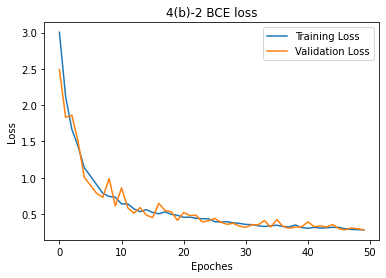

In [8]:
# Plot
plt.plot(np.arange(epochs), train_loss_record, label= "Training Loss")
plt.plot(np.arange(epochs), valid_loss_record, label="Validation Loss")
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.legend()
plt.title("4(b)-2 BCE loss")
plt.savefig("plots/Q4_b2")
plt.show()